In [3]:
import pandas as pd
from prophet import Prophet

# Load the CSV file into a DataFrame
all_data = pd.read_csv('stock_data.csv')

# Display the DataFrame to verify it has been imported correctly
all_data

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2013-04-01,21.670000,21.700001,21.320000,21.430000,15.651334,33718100,INTC
1,2013-04-02,21.520000,21.580000,21.320000,21.459999,15.673243,28166700,INTC
2,2013-04-03,21.450001,21.500000,21.010000,21.049999,15.373797,36620800,INTC
3,2013-04-04,21.049999,21.190001,20.959999,21.139999,15.439531,28702500,INTC
4,2013-04-05,20.940001,20.969999,20.750000,20.940001,15.293462,36721600,INTC
...,...,...,...,...,...,...,...,...
10063,2023-03-22,143.600006,147.416672,142.133331,142.169998,138.068588,3313200,SOXX
10064,2023-03-23,144.276672,147.630005,143.133331,145.676666,142.548950,4039800,SOXX
10065,2023-03-24,144.496674,144.889999,141.699997,143.149994,140.076523,3120600,SOXX
10066,2023-03-27,143.666672,144.106674,140.973328,141.470001,138.432602,1806300,SOXX


In [4]:
import yfinance as yf

# Ticker symbol for AMD
amd_symbol = 'AMD'

# Fetch AMD stock data for the past 11 years
amd_data = yf.download(amd_symbol, period='11y')

amd_data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,185.970001,187.690002,177.660004,178.679993,178.679993,75265600
2024-03-22,177.210007,180.759995,175.050003,179.649994,179.649994,57832100
2024-03-25,172.899994,182.800003,172.000000,178.630005,178.630005,71935300
2024-03-26,179.539993,182.600006,176.330002,177.869995,177.869995,65322400
2024-03-27,179.960007,181.229996,175.399994,179.589996,179.589996,55638000


In [5]:
amd_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

[*********************100%%**********************]  1 of 1 completed


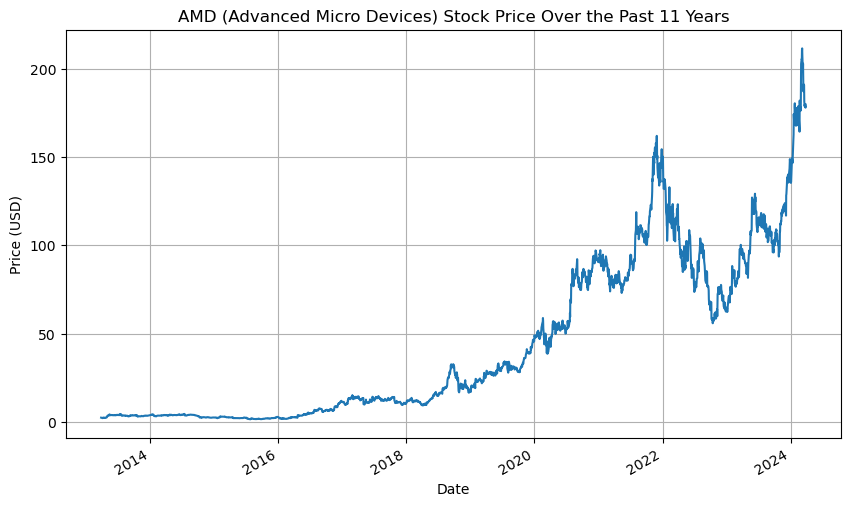

In [6]:
import matplotlib.pyplot as plt

# Ticker symbol for AMD
amd_symbol = 'AMD'

# Fetch AMD stock data for the past 11 years
amd_data = yf.download(amd_symbol, period='11y')

# Plot the 'Close' price
plt.figure(figsize=(10, 6))
amd_data['Close'].plot()
plt.title('AMD (Advanced Micro Devices) Stock Price Over the Past 11 Years')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [7]:
# Filter the data for AMD
amd_data = all_data[all_data['Ticker'] == 'AMD']

# Prophet expects the 'Date' and 'Close' columns
amd_data = amd_data[['Date', 'Close']]
amd_data.columns = ['ds', 'y']  # Renaming columns for Prophet

# Create a Prophet model for AMD
model_amd = Prophet()

# Fit the model
model_amd.fit(amd_data)

# Make a future dataframe for one year past the last available date
future_amd = model_amd.make_future_dataframe(periods=365)

# Forecast
forecast_amd = model_amd.predict(future_amd)

# Print the forecast
forecast_amd[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

18:46:22 - cmdstanpy - INFO - Chain [1] start processing
18:46:23 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
2877,2024-03-23,71.041472,57.356459,86.847309
2878,2024-03-24,70.992896,56.840268,86.375925
2879,2024-03-25,72.172719,57.141736,88.947566
2880,2024-03-26,72.016649,57.336214,87.295193
2881,2024-03-27,71.909976,57.393683,86.789008


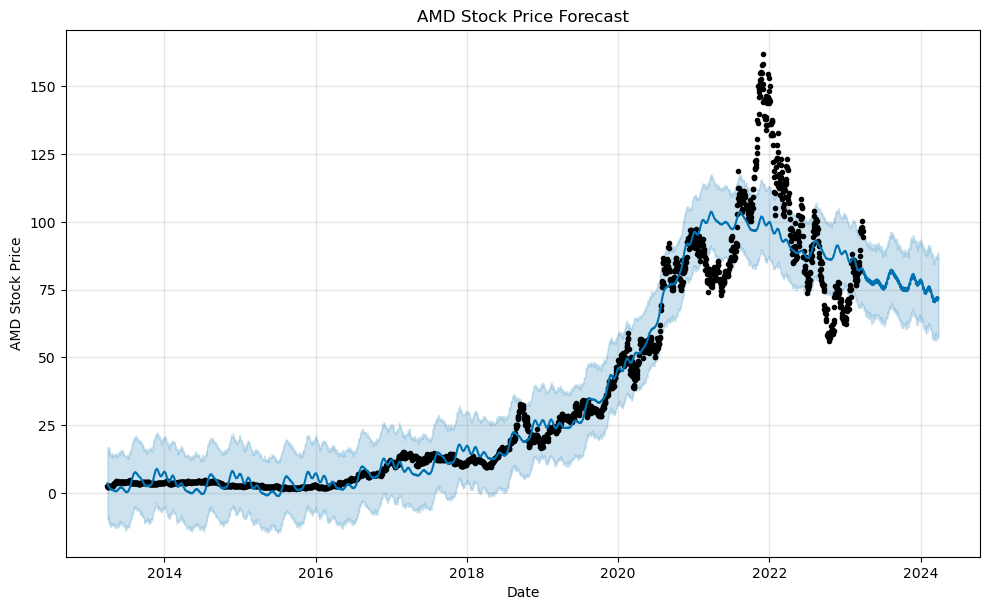

In [8]:
import matplotlib.pyplot as plt

# Plot the forecast for AMD
fig_amd = model_amd.plot(forecast_amd)
plt.xlabel('Date')
plt.ylabel('AMD Stock Price')
plt.title('AMD Stock Price Forecast')
plt.show()

[*********************100%%**********************]  1 of 1 completed


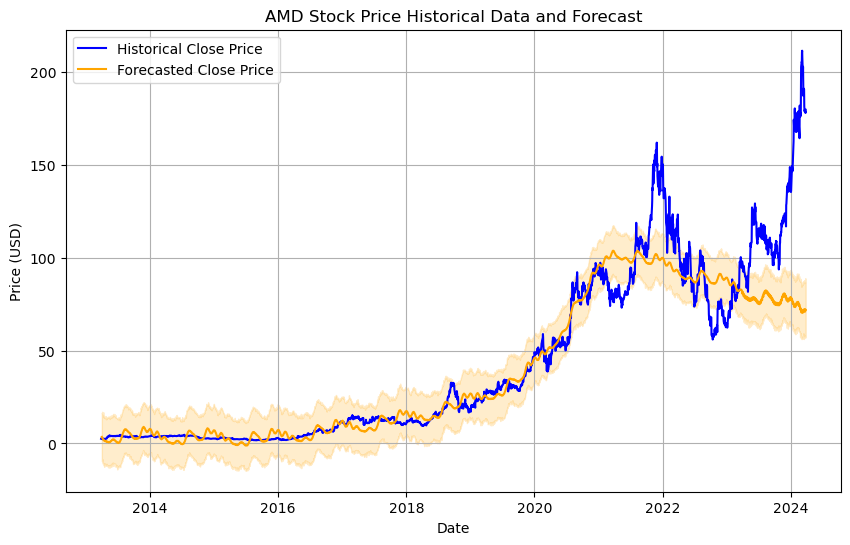

In [9]:
# Ticker symbol for AMD
amd_symbol = 'AMD'

# Fetch AMD stock data for the past 11 years
amd_data = yf.download(amd_symbol, period='11y')

# Plot both historical data and forecast for AMD
plt.figure(figsize=(10, 6))

# Plot historical data for AMD
plt.plot(amd_data.index, amd_data['Close'], label='Historical Close Price', color='blue')

# Plot forecast for AMD
plt.plot(forecast_amd['ds'], forecast_amd['yhat'], label='Forecasted Close Price', color='orange')
plt.fill_between(forecast_amd['ds'], forecast_amd['yhat_lower'], forecast_amd['yhat_upper'], color='orange', alpha=0.2)

plt.title('AMD Stock Price Historical Data and Forecast')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
# Calculate the percentage change of daily returns
daily_returns = amd_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns = daily_returns.dropna()

# Convert the series of daily returns into a DataFrame
daily_returns_df = pd.DataFrame({'Daily_Returns': daily_returns})

# Display the DataFrame
daily_returns_df

,Daily_Returns
Date,
2013-04-01,-0.043137
2013-04-02,-0.020492
2013-04-03,-0.029289
2013-04-04,0.004310
2013-04-05,-0.017167
...,...
2024-03-21,-0.005842
2024-03-22,0.005429
2024-03-25,-0.005678


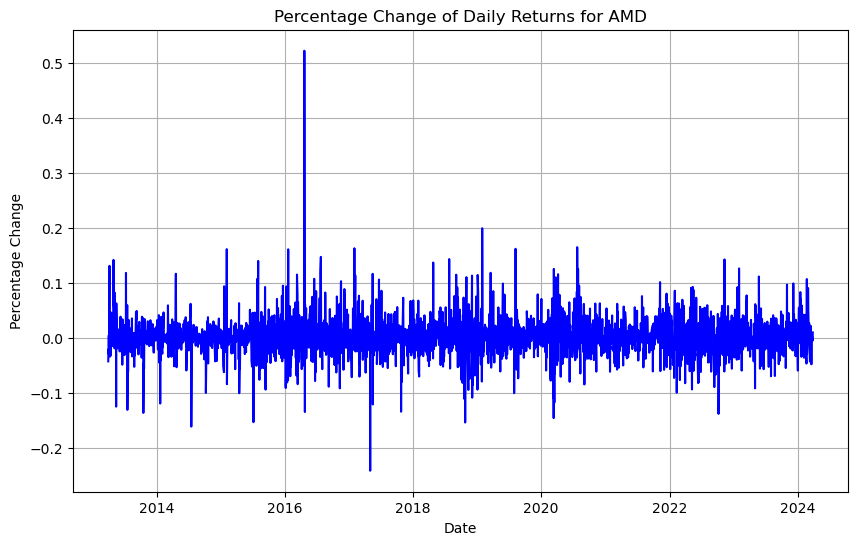

In [14]:
import matplotlib.pyplot as plt

# Calculate the percentage change of daily returns
daily_returns = amd_data['Adj Close'].pct_change()

# Drop the first row since it will have NaN value as there is no previous day for the first day
daily_returns = daily_returns.dropna()

# Plot the percentage change of daily returns
plt.figure(figsize=(10, 6))
plt.plot(daily_returns.index, daily_returns.values, color='blue')
plt.title('Percentage Change of Daily Returns for AMD')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.show()